In [1]:
import os
os.sys.path

['/home/khaldoun/tfgpu/InnoSpark-edir/ML first attempt',
 '/home/khaldoun/anaconda3/envs/khaldoun1/lib/python38.zip',
 '/home/khaldoun/anaconda3/envs/khaldoun1/lib/python3.8',
 '/home/khaldoun/anaconda3/envs/khaldoun1/lib/python3.8/lib-dynload',
 '',
 '/home/khaldoun/.local/lib/python3.8/site-packages',
 '/home/khaldoun/anaconda3/envs/khaldoun1/lib/python3.8/site-packages',
 '/home/khaldoun/anaconda3/envs/khaldoun1/lib/python3.8/site-packages/IPython/extensions',
 '/home/khaldoun/.ipython']

In [2]:
import numpy as np
import cv2
import os 
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
import random 
from sklearn.model_selection import train_test_split

from sklearn import svm, metrics

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier



In [3]:
#import Excelsheet
path = r"./input/5k_diagnosis"
df = pd.read_csv(os.path.join(path, "full_df.csv"))
#df = df.head(200)
df.head()



,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [4]:
file_names = []
labels = []

for text, label, file_name in zip(df["Left-Diagnostic Keywords"], df["C"], df["Left-Fundus"]):
    
    if(("cataract" in text) and (label == 1)):
        file_names.append(file_name)
        labels.append(1)
    
    elif(("normal fundus" in text) and (label == 0)):
        file_names.append(file_name)
        labels.append(0)
        
for text, label, file_name in zip(df["Right-Diagnostic Keywords"], df["C"], df["Right-Fundus"]):
    
    if(("cataract" in text) and (label == 1)):
        file_names.append(file_name)
        labels.append(1)
    
    elif(("normal fundus" in text) and (label == 0)):
        file_names.append(file_name)
        labels.append(0)

print(len(file_names), len(labels))


6162 6162


In [5]:
#define Image size 
ROW = 64
COL = 64

In [6]:
#load images into numpy array and resize them 
image_data = []
for idx, image_name in enumerate(file_names):
    
    img = cv2.imread(os.path.join(path,"preprocessed_images",image_name))
    try:
        img = cv2.resize(img, (ROW, COL))
        image_data.append(img)
    except:
        del labels[idx]
    
image_data = np.array(image_data)

print(image_data.shape)

(6078, 64, 64, 3)


In [7]:

#prepare training data by sampling 
temp = []
for idx, label in enumerate(labels):
    if label == 0:
        temp.append(idx)

temp = sample(temp, len([label for label in labels if label == 1]))

X_data = []
y_data = []

for idx in temp:
    X_data.append(image_data[idx])
    y_data.append(labels[idx])

temp = []
for idx, label in enumerate(labels):
    if label == 1:
        temp.append(idx)
        
for idx in temp:
    X_data.append(image_data[idx])
    y_data.append(labels[idx])

X_data = np.array(X_data)
y_data = np.array(y_data)


print(X_data.shape, y_data.shape)



(1178, 64, 64, 3) (1178,)


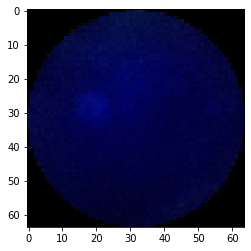

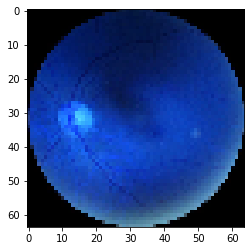

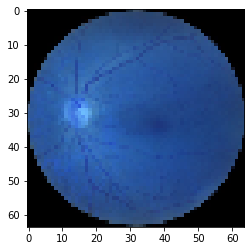

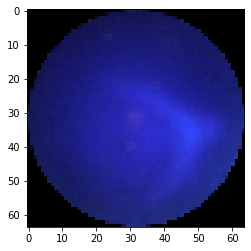

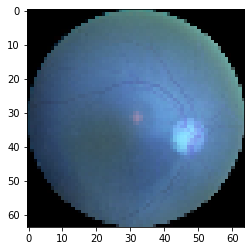

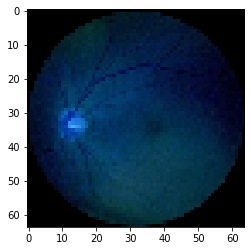

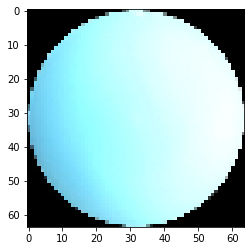

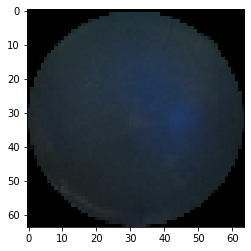

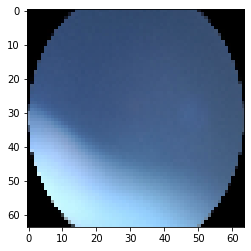

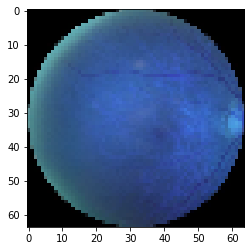

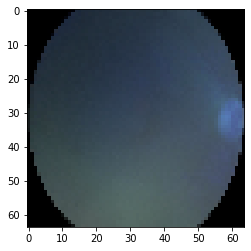

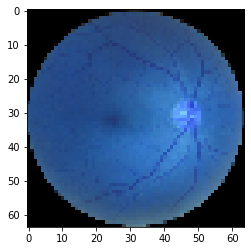

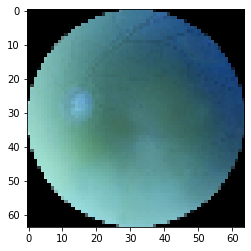

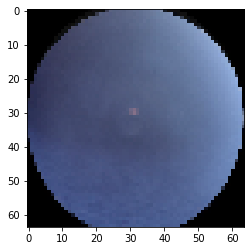

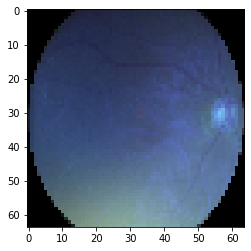

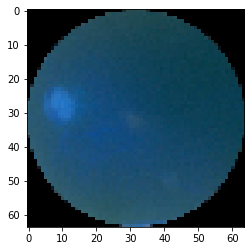

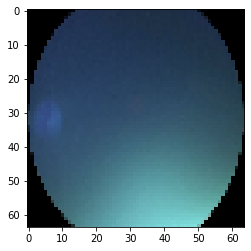

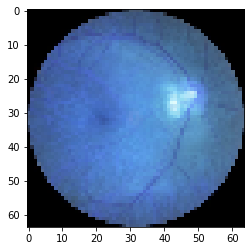

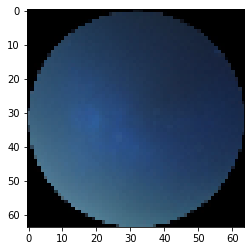

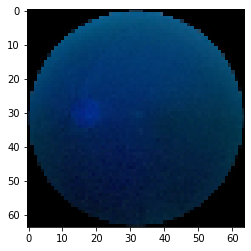

In [8]:
#display some images 
for i in range(20):
    n = random. randint(0,len(y_data))
    plt.imshow(X_data[n])
    plt.show()
    


#  Train CNN


In [9]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
#fix this man 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [10]:

X_data_CNN = (X_data / 255)
y_data

array([0, 0, 0, ..., 1, 1, 1])

In [11]:
#split data into train and test 

X_train, X_test, y_train, y_test = train_test_split(X_data_CNN, y_data, test_size=0.15, shuffle = True, random_state = 1)


#split train into train and validation 

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.20, shuffle = True, random_state = 2)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)


(800, 64, 64, 3) (800,)
(201, 64, 64, 3) (201,)
(177, 64, 64, 3) (177,)


In [12]:
save_dir = './saved_models'
model_name = 'k.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)




k_dc = 0.2	# Dropout constant for convolutional layers
k_dd = 0.5	# Dropout constant for dense layers


In [13]:
def create_model(activation_conv = 'relu', activation_dense = 'relu', activation_output = None , loss = 'mse' , lr = 0.001 ):
    model = models.Sequential()
    
    model.add(layers.Conv2D(32*2, (3, 3), input_shape=(ROW,COL,3) , padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(activation_conv))
    model.add(Dropout(k_dc))
    model.add(layers.Conv2D(32, (3, 3) , padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(activation_conv))
    model.add(Dropout(k_dc))
    model.add(layers.Conv2D(32, (3, 3) , padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(activation_conv))
    model.add(Dropout(k_dc))
    #model.add(layers.Conv2D(32, (3, 3), activation=activation_conv , padding='same'))
    #model.add(layers.Conv2D(32, (3, 3), activation=activation_conv , padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    
    
    model.add(layers.Conv2D(64, (3, 3) , padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(activation_conv))
    model.add(Dropout(k_dc))
    model.add(layers.Conv2D(64, (3, 3) , padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(activation_conv))
    model.add(Dropout(k_dc))
    model.add(layers.Conv2D(64, (3, 3) , padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(activation_conv))
    model.add(Dropout(k_dc)) 
    model.add(layers.MaxPooling2D((2, 2)))
    

    model.add(layers.Conv2D(128, (3, 3) , padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(activation_conv))
    model.add(Dropout(k_dc))
    model.add(layers.Conv2D(128, (3, 3) , padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(activation_conv))
    model.add(Dropout(k_dc))
    model.add(layers.Conv2D(128*2, (3, 3) , padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(activation_conv))
    model.add(Dropout(k_dc)) 
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(Dense(64*4, use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation(activation_dense))
    model.add(Dropout(k_dd))

    model.add(Dense(1, use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation(activation_output))


    opt = tf.keras.optimizers.RMSprop(learning_rate=lr)
    model.compile(
        optimizer=opt, 
        loss = 'mse',
        metrics=['accuracy'])
    return model


In [14]:
def run(model , name = "k", epochs = 30):
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.1,  # set range for random shear
        zoom_range=0.2,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        #validation_split=0.15
    )

    # We stop when the best validation loss is 200 epochs in the past
    stopping = EarlyStopping(monitor='val_loss', patience=20*3)

    # We save the best model based on validation loss
    checkpoints = ModelCheckpoint(model_path, save_best_only=True)

    # We reduce the learning rate by half when the best validation 50 epochs in the past
    rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10*3, min_delta=1E-7)
    
    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(X_train)
    train_generator = datagen.flow(X_train, y_train, batch_size=32)
    valid_generator = datagen.flow(X_val, y_val, batch_size=32)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(train_generator,
                        validation_data=valid_generator,
                        epochs=epochs
                                 ,callbacks=[stopping, checkpoints, rlrp],)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print(f"The test accuracy is: {test_acc}")
    print(f"The test lose is : {test_loss}")
    
    os.rename(model_path, os.path.join(save_dir, f"{name}-{int(test_acc*100)}.h5"))
    
    return history


In [15]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0

/home/khaldoun/anaconda3/envs/khaldoun1/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
25/25 [==============================] - 17s 580ms/step - loss: 1.4318 - accuracy: 0.4967 - val_loss: 0.4112 - val_accuracy: 0.5373
Epoch 2/100
25/25 [==============================] - 12s 480ms/step - loss: 1.0183 - accuracy: 0.6202 - val_loss: 0.2449 - val_accuracy: 0.5323
Epoch 3/100
25/25 [==============================] - 14s 566ms/step - loss: 0.8495 - accuracy: 0.6959 - val_loss: 0.7059 - val_accuracy: 0.4627
Epoch 4/100
25/25 [==============================] - 12s 480ms/step - loss: 0.7665 - accuracy: 0.7230 - val_loss: 1.0423 - val_accuracy: 0.4627
Epoch 5/100
25/25 [==============================] - 12s 483ms/step - loss: 0.7041 - accuracy: 0.7188 - val_loss: 0.9076 - val_accuracy: 0.4627
Epoch 6/100
25/25 [==============================] - 12s 481ms/step - loss: 0.6300 - accuracy: 0.7630 - val_loss: 0.4932 - val_accuracy: 0.4876
Epoch 7/100
25/25 [==============================] - 12s 480ms/step - loss: 0.5827 - accuracy: 0.7806 - val_loss: 0.5257 - val_accuracy:

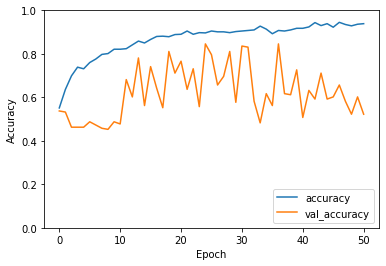

In [16]:
run(model, name="relu", epochs=100*2)

In [17]:
model2 = create_model( activation_output = 'sigmoid' )

Epoch 1/100
25/25 [==============================] - 14s 509ms/step - loss: 0.2344 - accuracy: 0.6228 - val_loss: 0.2814 - val_accuracy: 0.4627
Epoch 2/100
25/25 [==============================] - 13s 527ms/step - loss: 0.2138 - accuracy: 0.6700 - val_loss: 0.3617 - val_accuracy: 0.4627
Epoch 3/100
25/25 [==============================] - 13s 502ms/step - loss: 0.1975 - accuracy: 0.7053 - val_loss: 0.2742 - val_accuracy: 0.4627
Epoch 4/100
25/25 [==============================] - 12s 497ms/step - loss: 0.1900 - accuracy: 0.7077 - val_loss: 0.2439 - val_accuracy: 0.5075
Epoch 5/100
25/25 [==============================] - 12s 487ms/step - loss: 0.1812 - accuracy: 0.7493 - val_loss: 0.3006 - val_accuracy: 0.4627
Epoch 6/100
25/25 [==============================] - 13s 501ms/step - loss: 0.1641 - accuracy: 0.7798 - val_loss: 0.3527 - val_accuracy: 0.4627
Epoch 7/100
25/25 [==============================] - 13s 504ms/step - loss: 0.1639 - accuracy: 0.7855 - val_loss: 0.3761 - val_accuracy:

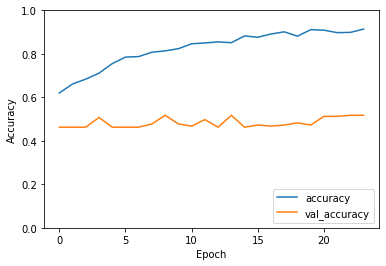

In [18]:
run(model2, name="sigmoid", epochs=100)

Epoch 1/100
25/25 [==============================] - 14s 508ms/step - loss: 1.2713 - accuracy: 0.5576 - val_loss: 0.6349 - val_accuracy: 0.5373
Epoch 2/100
25/25 [==============================] - 14s 549ms/step - loss: 0.9995 - accuracy: 0.6549 - val_loss: 0.8432 - val_accuracy: 0.4577
Epoch 3/100
25/25 [==============================] - 13s 521ms/step - loss: 0.9692 - accuracy: 0.6341 - val_loss: 10.0146 - val_accuracy: 0.4627
Epoch 4/100
25/25 [==============================] - 13s 515ms/step - loss: 0.9067 - accuracy: 0.6450 - val_loss: 0.2994 - val_accuracy: 0.4627
Epoch 5/100
25/25 [==============================] - 13s 533ms/step - loss: 0.7845 - accuracy: 0.6867 - val_loss: 0.9873 - val_accuracy: 0.4577
Epoch 6/100
25/25 [==============================] - 13s 510ms/step - loss: 0.7451 - accuracy: 0.6923 - val_loss: 0.8484 - val_accuracy: 0.4577
Epoch 7/100
25/25 [==============================] - 13s 508ms/step - loss: 0.5785 - accuracy: 0.7511 - val_loss: 0.2354 - val_accuracy

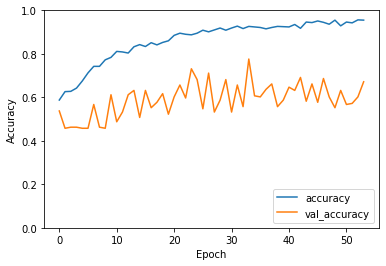

In [19]:
model = create_model()
run(model, name="relu", epochs=100)

In [20]:
model2 = create_model( activation_output = 'sigmoid' )

In [ ]:
run(model2, name="sigmoid", epochs=100)

Epoch 1/100
25/25 [==============================] - 14s 493ms/step - loss: 0.2473 - accuracy: 0.5405 - val_loss: 0.3257 - val_accuracy: 0.4627
Epoch 2/100
25/25 [==============================] - 12s 478ms/step - loss: 0.2349 - accuracy: 0.5907 - val_loss: 0.3775 - val_accuracy: 0.4627
Epoch 3/100
25/25 [==============================] - 12s 485ms/step - loss: 0.2126 - accuracy: 0.6481 - val_loss: 0.4168 - val_accuracy: 0.4776
Epoch 4/100
25/25 [==============================] - 12s 476ms/step - loss: 0.1940 - accuracy: 0.7126 - val_loss: 0.4044 - val_accuracy: 0.4627
Epoch 5/100
25/25 [==============================] - 12s 492ms/step - loss: 0.1704 - accuracy: 0.7830 - val_loss: 0.2626 - val_accuracy: 0.4627
Epoch 6/100
25/25 [==============================] - 12s 497ms/step - loss: 0.1707 - accuracy: 0.7734 - val_loss: 0.2585 - val_accuracy: 0.5373
Epoch 7/100
25/25 [==============================] - 12s 480ms/step - loss: 0.1688 - accuracy: 0.7731 - val_loss: 0.2482 - val_accuracy: